# This notebook implements the software program: fragments_from_footprinting
Author: Ariana Brenner Clerkin <br>
Date: 2 March 2023

Load appropriate modules

In [1]:
import fragments_from_footprinting as ff

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

### Global Variables 

In [3]:
min_range = -1200
max_range = 1200
midpt_bin_width = 10.
max_frag = 1000
bin_boundaries = list(np.linspace(min_range,max_range, 1+int((max_range-min_range)/midpt_bin_width)))
bin_labels = bin_boundaries[:-1]

### Execute a fragments_from_footprinting example

In [4]:
data_fold = '/ru-auth/local/home/abrenner/myscratch/temp_footprint/'

In [5]:
cd /ru-auth/local/home/abrenner/myscratch/temp_footprint/

/lustre/fs4/risc_lab/scratch/abrenner/temp_footprint


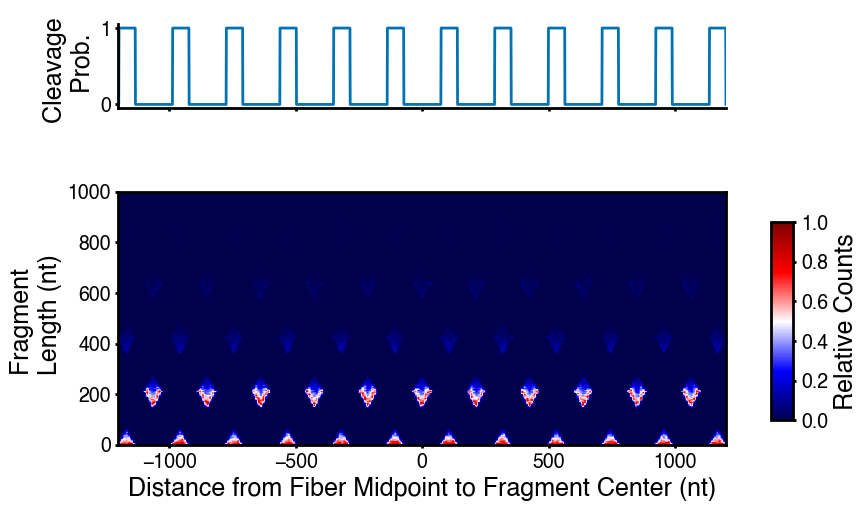

In [6]:
cp = ff.generate_cleav_prob()
attempted, actual = ff.get_breaks_to_try(cp) # unused in this notebook, just documented to remember its there
frag_lens_all_trials, midpts_all_trials = ff.get_fld(cp)
fm = ff.frag_mid_df(frag_lens_all_trials, midpts_all_trials)
vp_data = ff.vplot_data(fm)
ff.plot_vplot(vp_data)

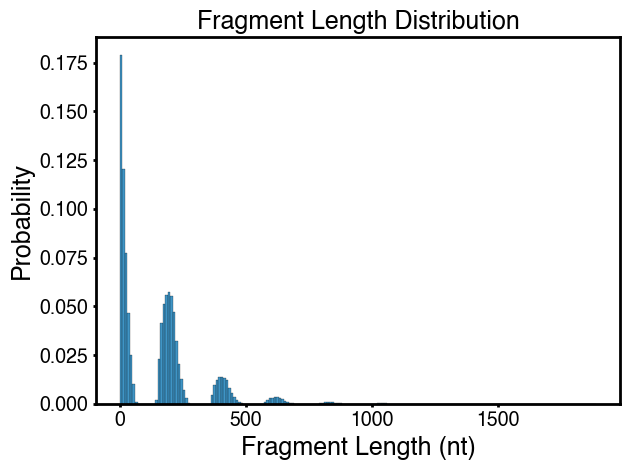

In [7]:
ff.plot_fld()

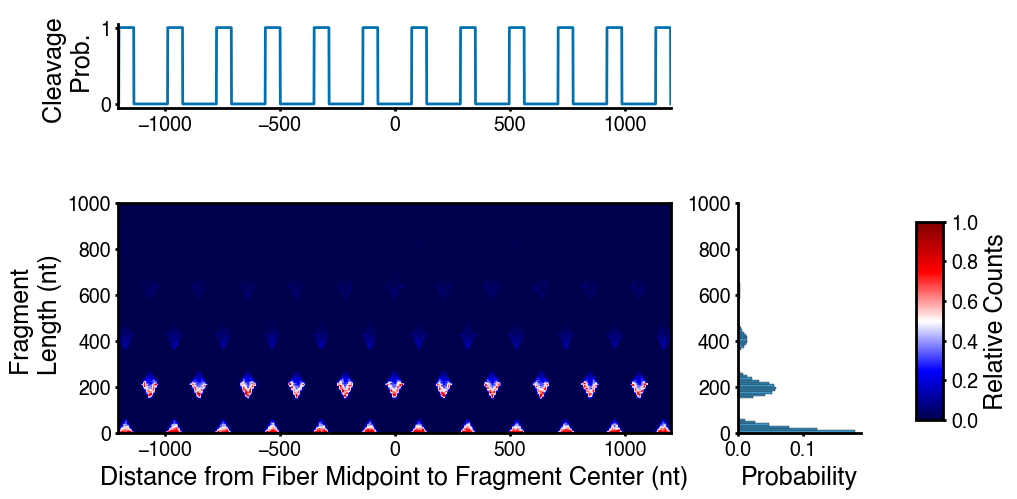

In [8]:
ff.plot_composite(vp_data)

In [9]:
# dist_from_center = 300
# max_frag = 500
# bin_locs=10
# bin_lens = 1
# midpt = int(len(cp)/2)
# fm['relative_mid'] = fm.midpoints - midpt
# fm_sub = fm[(fm.frag_len < max_frag) & (np.abs(fm.relative_mid) < dist_from_center)]
# min_range = -1. * dist_from_center
# max_range = dist_from_center
#     # midpt_bin_width = 10.
# bin_boundaries = list(np.linspace(min_range,max_range, 1+int((max_range-min_range)/bin_locs)))
# bin_labels = bin_boundaries[:-1]
# min_frag = 0.
# bin_len_boundaries = list(np.linspace(min_frag,max_frag, 1+int((max_frag-min_frag)/bin_lens)))
    
    
# plt.hist2d(x=fm_sub["relative_mid"], y=fm_sub["frag_len"], bins=[len(bin_labels),len(bin_len_boundaries[:-1])])

In [10]:
# fm

In [11]:
# max_y_bin = 1000
# min_y = 0#50
# data_for_hist = frags_and_mids[frags_and_mids.frag_len<max_y_bin].frag_len
# stored_histogram = sns.histplot(data=frag_lens_all_trials, binwidth=10, stat= 'probability')
# plt.title('Fragment Length Distribution')
# plt.xlabel('Fragment Length (nt)')
# plt.tight_layout()
# # plt.savefig(data_fold + 'fld.pdf')
# plt.show()

In [12]:
# #     frag_lens = np.load('frag_lens.npy') # TO DO write if statement if the file does not exist.

# fig, ax = plt.subplots(2,2,figsize = (11,6), gridspec_kw={'height_ratios': [1, 4], 'width_ratios': [9, 2]}, sharex=True)
# max_fragment = 1000
# # data_for_hist = pd.DataFrame(fm[fm.frag_len<max_y_bin].frag_len)
# frag_lens_sub = frag_lens_all_trials[frag_lens_all_trials<max_fragment]
# data_for_hist = pd.DataFrame({'frag_len':frag_lens_sub})
# sns.histplot(data=data_for_hist, y = 'frag_len', bins=100, stat= 'probability')#, element="poly")
# plt.title('Fragment Length Distribution')
# plt.ylabel('Fragment Length (nt)')
# plt.tight_layout()
# #     plt.savefig('fld.pdf')
# plt.show() 

In [13]:
# frag_lens_all_trials[frag_lens_all_trials<20]

<AxesSubplot:xlabel='Probability', ylabel=' '>

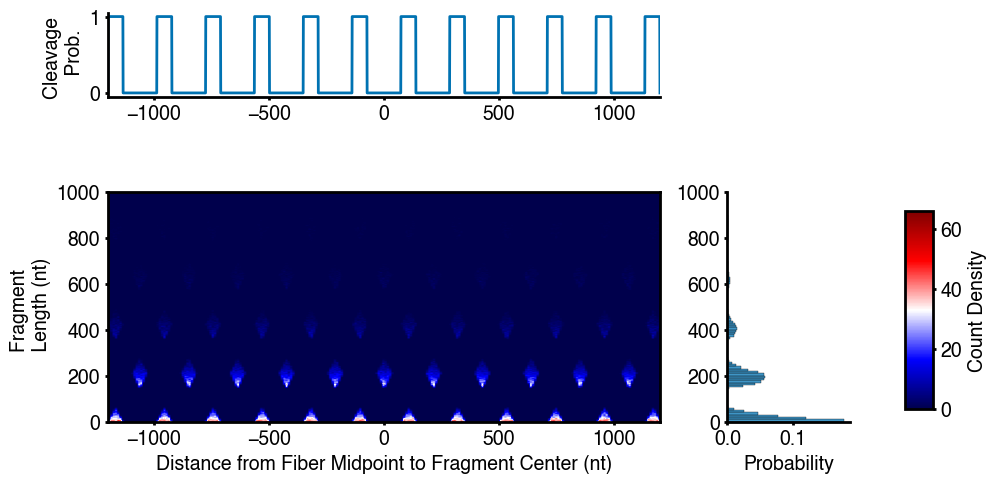

In [14]:
data_for_hist = pd.DataFrame(fm[fm.frag_len<max_frag].frag_len)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['axes.labelsize'] = 14

midpoint = len(cp)/2

fig, (ax1, ax2) = plt.subplots(2,2,figsize = (11,6), gridspec_kw={'height_ratios': [1, 4], 'width_ratios': [9, 2]})#, sharex=True, sharey=True)
cp_to_plot = cp[int(min_range)+int(midpoint):int(max_range)+int(midpoint)]
ax1[0].plot(np.linspace(min_range, max_range, len(cp_to_plot)),cp_to_plot)#, linewidth=3)
# cleavage = 
ax1[0].set_ylabel('Cleavage \n Prob.')
ax1[0].set_xlim((min_range,max_range))

# Get rid of unwanted axes
ax1[0].spines['right'].set_visible(False)
ax1[0].spines['top'].set_visible(False)
ax2[1].spines['right'].set_visible(False)
ax2[1].spines['top'].set_visible(False)

#Clear top right plot
ax1[1].clear()
ax1[1].axis("off")
ax1[1].set_visible(False)
ax1[1].remove()

im = ax2[0].imshow(np.flip(vp_data.T), cmap='seismic', extent = [min_range, max_range, 0, max_frag], aspect=1)
ax2[0].set_xlabel('Distance from Fiber Midpoint to Fragment Center (nt)')
ax2[0].set_ylabel('Fragment \n Length (nt)')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.22, 0.025, 0.33])
cbar = fig.colorbar(im, ax=ax2[0], cax=cbar_ax)#shrink=0.35)
cbar.set_label('Count Density')

# Set shared axes
ax1[0].sharex(ax2[0])
ax2[1].sharey(ax2[0])

# asp = np.diff(ax2[1].get_xlim())[0] / np.diff(ax2[1].get_xlim())[0]
# ax2[1].set_aspect(asp)
# asp = np.diff(ax2[1].get_xlim())[0] / np.diff(ax2[1].get_ylim())[0]
# asp /= np.abs(np.diff(ax2[0].get_xlim())[0] / np.diff(ax2[0].get_ylim())[0])
# ax2[1].set_aspect(asp)

# Got scaled value by guessing and checking.
ax2[1].set_box_aspect(1.875)

ax2[1].set_ylabel(' ')
sns.histplot(data=data_for_hist, y = 'frag_len', bins=100, stat= 'probability', ax=ax2[1])#, element="poly")
# plt.tight_layout()

# plt.savefig(data_fold+'temp.pdf')

### Clean above for package

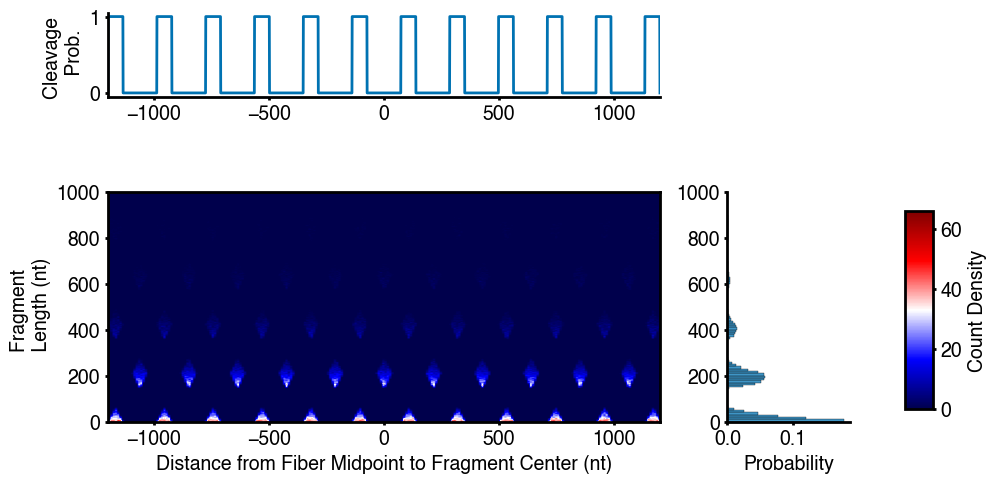

In [15]:
data_for_hist = pd.DataFrame(fm[fm.frag_len<max_frag].frag_len)

midpoint = len(cp)/2

fig, (ax1, ax2) = plt.subplots(2,2,figsize = (11,6), gridspec_kw={'height_ratios': [1, 4], 'width_ratios': [9, 2]})#, sharex=True, sharey=True)
cp_to_plot = cp[int(min_range)+int(midpoint):int(max_range)+int(midpoint)]
ax1[0].plot(np.linspace(min_range, max_range, len(cp_to_plot)),cp_to_plot)#, linewidth=3)
# cleavage = 
ax1[0].set_ylabel('Cleavage \n Prob.')
ax1[0].set_xlim((min_range,max_range))

# Get rid of unwanted axes
ax1[0].spines['right'].set_visible(False)
ax1[0].spines['top'].set_visible(False)
ax2[1].spines['right'].set_visible(False)
ax2[1].spines['top'].set_visible(False)

#Clear top right plot
ax1[1].clear()
ax1[1].axis("off")
ax1[1].set_visible(False)
ax1[1].remove()

im = ax2[0].imshow(np.flip(vp_data.T), cmap='seismic', extent = [min_range, max_range, 0, max_frag], aspect=1)
ax2[0].set_xlabel('Distance from Fiber Midpoint to Fragment Center (nt)')
ax2[0].set_ylabel('Fragment \n Length (nt)')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.22, 0.025, 0.33])
cbar = fig.colorbar(im, ax=ax2[0], cax=cbar_ax)#shrink=0.35)
cbar.set_label('Count Density')

# Set shared axes
ax1[0].sharex(ax2[0])
ax2[1].sharey(ax2[0])

# asp = np.diff(ax2[1].get_xlim())[0] / np.diff(ax2[1].get_xlim())[0]
# ax2[1].set_aspect(asp)
# asp = np.diff(ax2[1].get_xlim())[0] / np.diff(ax2[1].get_ylim())[0]
# asp /= np.abs(np.diff(ax2[0].get_xlim())[0] / np.diff(ax2[0].get_ylim())[0])
# ax2[1].set_aspect(asp)

# Got scaled value by guessing and checking.
ax2[1].set_box_aspect(1.875)

ax2[1].set_ylabel(' ')
sns.histplot(data=data_for_hist, y = 'frag_len', bins=100, stat= 'probability', ax=ax2[1])#, element="poly")
# plt.tight_layout()

plt.savefig(data_fold+'temp.pdf')